# Introduction / Name of Capstone Project 

projet titanic : predire si une personne a survecu ou pas

# Library Imports 

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer

# Exploratory Analysis

In [129]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
#dataframe dimensions
df.shape

(891, 12)

In [37]:
#colums datatypes
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

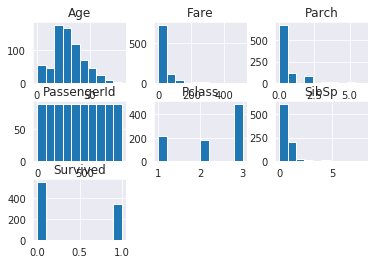

In [38]:
#histogrammes
df.hist()

#plot histogrammes
plt.show()

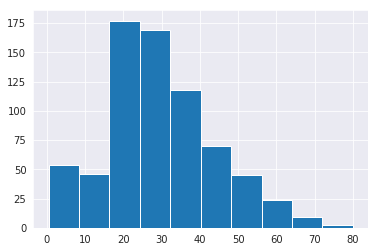

In [39]:
df.Age.hist()

In [40]:
df.describe(include = 'object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Strandberg, Miss. Ida Sofia",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


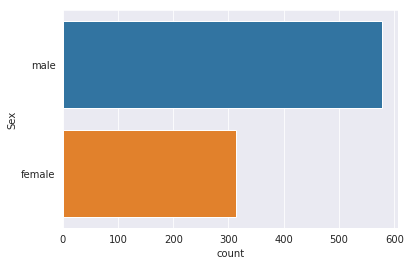

In [34]:
#plot gender
sns.countplot(y = 'Sex', data = df)
plt.show()

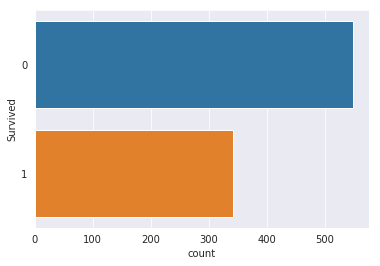

In [41]:
#plot survival
sns.countplot(y = 'Survived', data = df)
plt.show()

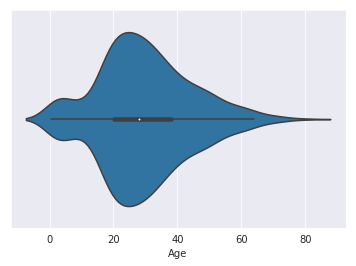

In [44]:
#plot age
sns.violinplot('Age', data = df)


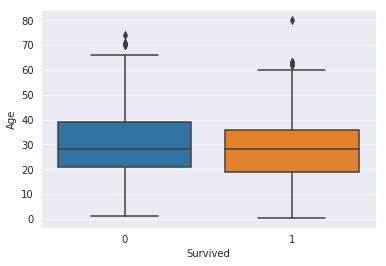

In [45]:
#plot age avec survived
sns.boxplot(y= 'Age', x ='Survived', data = df)

In [49]:
correlations = df.corr()
correlations

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


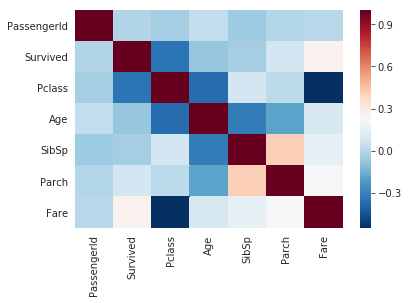

In [51]:
sns.heatmap(correlations, cmap = 'RdBu_r')

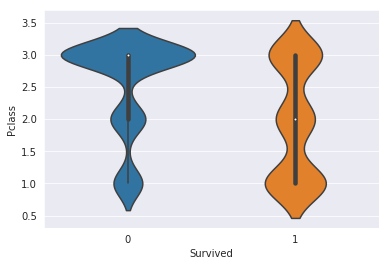

In [53]:
#violinplot entre les survivants et la classe
sns.violinplot(y='Pclass', x='Survived', data=df)

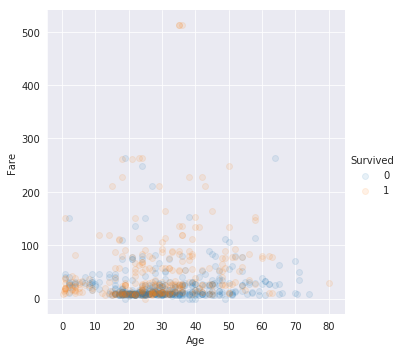

In [56]:
#scatter plot survival et age 
sns.lmplot(x='Age',
           y='Fare',
           hue='Survived',
           data=df,
           fit_reg=False,
           scatter_kws={'alpha':0.1})
plt.show()

# Data Cleaning 

In [58]:
#drop duplicates
df = df.drop_duplicates()
print(df.shape)

(891, 12)


In [80]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [72]:
# my_imputer = SimpleImputer(strategy='most_frequent')
# my_imputer.fit(df)
# my_imputer.transform(df)
# new_df = df.copy
# new_df = pd.dataframe(myimputer)

In [74]:
#replace mising values in cabin with most frequent values
my_imputer = SimpleImputer(strategy='most_frequent')
my_imputer.fit(df['Cabin'].values.reshape(-1, 1))
df['Cabin'] = my_imputer.transform(df['Cabin'].values.reshape(-1, 1))


In [76]:
#replace mising values in age with most median age
second_imputer = SimpleImputer(strategy = 'median')
second_imputer.fit(df['Age'].values.reshape(-1,1))
df['Age'] = second_imputer.transform(df['Age'].values.reshape(-1,1))

In [79]:
#replace missing values in embarked with 
df.fillna('missing', inplace = True)

In [81]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


# Feature Engineering

In [85]:
#put ages by groups and fill the missing age by median age group
df_corr = df.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_corr[df_corr['Feature 1'] == 'Age']

,Feature 1,Feature 2,Correlation Coefficient
5,Age,Age,1.000000
12,Age,Pclass,0.339898
17,Age,SibSp,0.233296
21,Age,Parch,0.172482
26,Age,Fare,0.096688
31,Age,Survived,0.064910
40,Age,PassengerId,0.034212


In [87]:
#group passengers by sex and Pclass and calculate the median age
age_by_pclass_sex = df.groupby(['Sex','Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print(f'Median age of Pclass {pclass} {sex}s:{age_by_pclass_sex[sex][pclass]}')
print(f'Median age of all passengers: {df.Age.median()}')

Median age of Pclass 1 females:32.5
Median age of Pclass 1 males:36.0
Median age of Pclass 2 females:28.0
Median age of Pclass 2 males:29.0
Median age of Pclass 3 females:28.0
Median age of Pclass 3 males:28.0
Median age of all passengers: 28.0


In [88]:
#Filling missing values in age with the medians value by sex and Pclass groups

df.Age = df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x:x.fillna(x.median()))


In [94]:
#embarked class missing replace by 'S' because of a websearch about this person
df[df['Embarked']== 'missing'].replace('missing', 'S')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


In [117]:
#count the number of survival
survived = df['Survived'].value_counts()[1]
not_survived = df['Survived'].value_counts()[0]
survived_perc = survived/df.shape[0] * 100
not_survived_perc = not_survived/df.shape[0]*100
print('{} of {} passengers survived and it is the {:.2f}% of the training set.'.format(survived, df.shape[0], survived_perc))
print('{} of {} passengers didnt survive and it is the {:.2f}% of the training set.'.format(not_survived, df.shape[0], not_survived_perc))


342 of 891 passengers survived and it is the 38.38% of the training set.
549 of 891 passengers didnt survive and it is the 61.62% of the training set.


['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp']


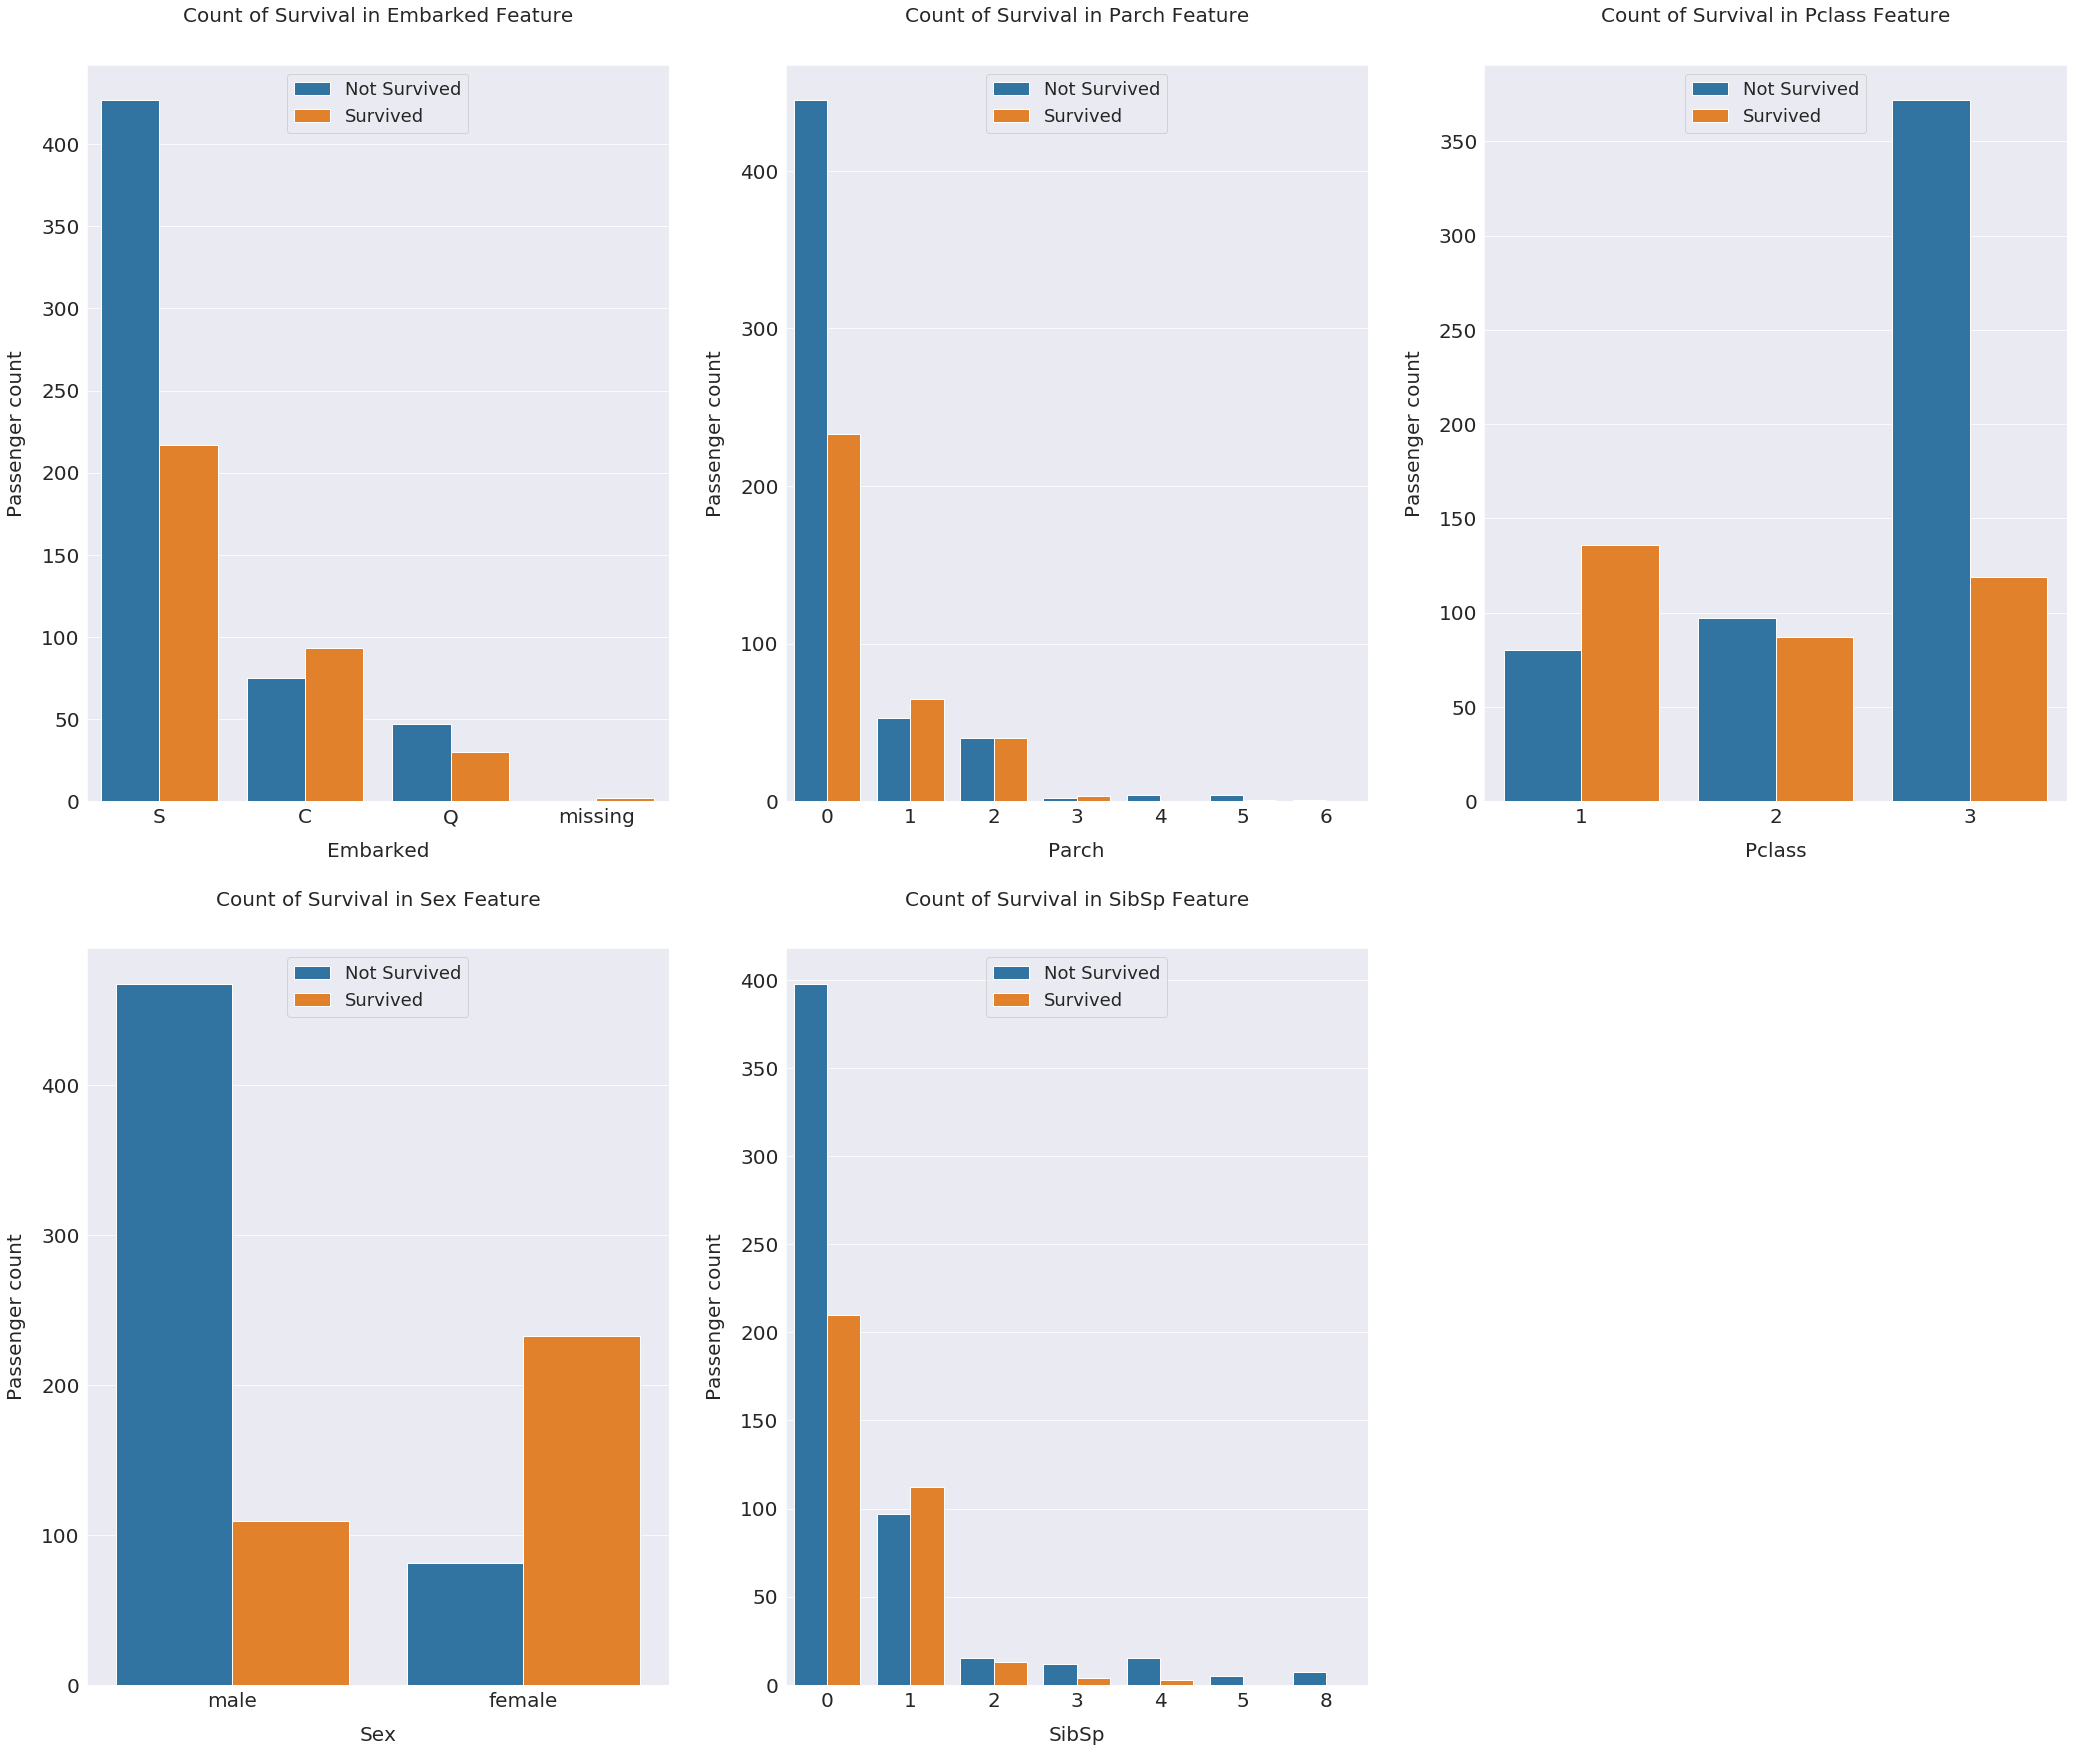

In [128]:
#manage categorical features
mask = (df.dtypes == 'object')
# print(mask)
cat_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp']
print(cat_features)
fig, axs = plt.subplots(ncols = 2, nrows = 3, figsize = (20, 20))
plt.subplots_adjust(right = 1.5, top = 1.25)

for i, feature in enumerate(cat_features,1):
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Survived', data =df)
    
    plt.xlabel(f'{feature}', size =20, labelpad =15)
    plt.ylabel('Passenger count', size = 20, labelpad = 15)
    plt.tick_params(axis = 'x', labelsize = 20)
    plt.tick_params(axis ='y', labelsize = 20)
    
    plt.legend(['Not Survived', 'Survived'], loc ='upper center', prop = {'size': 18})
    plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)
    
plt.show()

In [134]:
df_all = pd.concat(b[df,df_test])
df_all.head()
df_all.shape

/home/fatima_moqran/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(1309, 12)

In [136]:
df.shape
df_test.shape

(418, 11)

# Algorithm Selection

# Model Training

# Insights & Analysis